# Caso de uso 1 - Naive Bayes
Un hospital solicitó crear un modelo para ayudar a detectar enfermedades a partir de síntomas. Somos los encargados de desarrollar un modelo a partir de Naive Bayes que pueda resolver el problema del hospital.

### Paso 1. Cargar el dataset
Importar las librerías necesarias y cargar el archivo de Excel.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, 
classification_report, ConfusionMatrixDisplay

In [35]:
df = pd.read_excel("naive.xlsx")
df.head()

,ID,Enfermedad,Fiebre,Tos seca,Dolor de garganta,Fatiga
0,1,Gripe,0,1,0,0
1,2,Bronquitis,1,1,1,1
2,3,Gripe,1,0,1,1
3,4,Gripe,1,1,1,1
4,5,Bronquitis,0,1,0,0


### Paso 2. Separar variables
Seleccionar las columnas de síntomas como **X** y la enfermedad como **y**.

In [36]:
X = df[["Fiebre", "Tos seca", "Dolor de garganta", "Fatiga"]]
y = df["Enfermedad"]

### Paso 3. Dividir en entrenamiento y prueba
Usar train_test_split para separar el dataset en 70% de entrenamiento y 30% de prueba.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=999,
    stratify=y
)

### Paso 4. Entrenar el modelo Naive Bayes
Crear el modelo con BernoulliNB (para datos booleanos) y entrenarlo.

In [47]:
model = BernoulliNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


# Paso 5. Evaluar el modelo
Calcular la precisión y mostrar matriz de confusión.

In [52]:
y_pred = model.predict(X_test)

In [55]:
print ("Precisión del modelo: ", accuracy_score(y_test, y_pred))

Precisión del modelo:  0.9


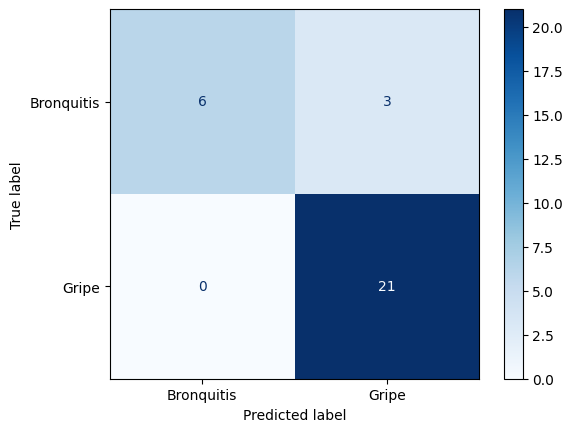

In [54]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

In [59]:
reporte = classification_report(y_test, y_pred, output_dict=True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
Bronquitis,1.000000,0.666667,0.800000,9.000000
Gripe,0.875000,1.000000,0.933333,21.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.937500,0.833333,0.866667,30.000000
weighted avg,0.912500,0.900000,0.893333,30.000000


### Paso 6. Predicción para un nuevo paciente
Se le solicita al usuario que ingrese sus síntomas y se predice la enfermedad.

##### Forma 1. Cargar hoja de excel del nuevo paciente.
Con esta forma, se tiene que tener una hoja en excel con los datos presentados, además las columnas de la hoja tienen que tener el mismo nombre que nuestro dataset.

In [69]:
paciente = pd.read_excel("naive.xlsx", sheet_name="paciente_1")

paciente = paciente[X.columns]

print("Predicción:", model.predict(paciente))

Predicción: ['Bronquitis']


##### Forma 2. Solicitar manualmente los datos al paciente.
Con esta forma, con inputs el paciente tiene que llenar sus síntomas y con la misma lógica, determinará que enfermedad tiene.

In [71]:
fiebre = int(input("¿Tienes fiebre? (1 = Sí, 0 = No): "))
tos = int(input("¿Tienes tos seca? (1 = Sí, 0 = No): "))
dolor = int(input("¿Tienes dolor de garganta? (1 = Sí, 0 = No): "))
fatiga = int(input("¿Tienes fatiga? (1 = Sí, 0 = No): "))

nuevo_paciente = pd.DataFrame([[fiebre, tos, dolor, fatiga]], columns=X.columns)

prediccion = model.predict(nuevo_paciente)[0]

print("Según el modelo, el diagnóstico probable es:" , prediccion)


¿Tienes fiebre? (1 = Sí, 0 = No):  1
¿Tienes tos seca? (1 = Sí, 0 = No):  1
¿Tienes dolor de garganta? (1 = Sí, 0 = No):  1
¿Tienes fatiga? (1 = Sí, 0 = No):  1


Según el modelo, el diagnóstico probable es: Gripe
